In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/siam2/Desktop/수원시_주정차단속현황.csv", encoding="cp949")
df.head(5)

,시군구명,단속구분,단속일자,총 단속건수,정상처리 건수,종결처리 건수,데이터기준일자
0,권선구경제교통과,고정형CCTV,2024-01-01,104,4,100,2025-04-16
1,권선구경제교통과,국민신문고,2024-01-01,134,17,117,2025-04-16
2,권선구경제교통과,모바일(개별시스템),2024-01-01,2,0,2,2025-04-16
3,권선구경제교통과,민원(공익제보),2024-01-01,1,0,1,2025-04-16
4,권선구경제교통과,안전신문고,2024-01-01,5,2,3,2025-04-16


In [2]:
df['시군구명'].value_counts()

시군구명
팔달구경제교통과    1478
권선구경제교통과    1370
영통구경제교통과    1360
장안구경제교통과    1241
Name: count, dtype: int64

In [ ]:
# 단속방법 열 추가 (추후 불법주차 단속위치 데이터와의 통합에 필요)
df['단속방법'] = df['단속구분'].map(
    lambda x: '고정형' if x == '고정형CCTV'
    else '주행형' if x == '주행형CCTV'
    else '국민신문고' if x in ['국민신문고', '모바일(개별시스템)', '민원(공익제보)', '안전신문고']
    else '보행' if x in ['수기보행등록', 'PDA']
    else '기타'
)

# 단속방법이 '기타'인 행 제거 (총 11건)
df = df[df['단속방법'] != '기타'].reset_index(drop=True)

df['단속방법'].value_counts()

단속방법
국민신문고    1674
고정형      1395
주행형      1375
보행        994
Name: count, dtype: int64

In [ ]:
# weight로 사용할 ratio 열 추가 (응급상황, 차량고장 및 중복 등의 경우는 분석에서 제외)
df['ratio'] = df['종결처리 건수']/df['총 단속건수']

df['ratio']


0       0.961538
1       0.873134
2       1.000000
3       1.000000
4       0.600000
          ...   
5433    0.126582
5434    0.523385
5435    0.142857
5436    0.138462
5437    0.118182
Name: ratio, Length: 5438, dtype: float64

In [ ]:
# 시군구별, 단속방법 별로 ratio의 평균값 계산 -> 추후 weight로 사용 예정
pivot = df.pivot_table(index = '시군구명', 
                       columns = '단속방법',
                       values = 'ratio',
                       aggfunc = 'mean')
pivot

단속방법,고정형,국민신문고,보행,주행형
시군구명,,,,
권선구경제교통과,0.206787,0.270934,0.134648,0.192131
영통구경제교통과,0.241487,0.323715,0.110963,0.192318
장안구경제교통과,0.179508,0.234355,0.085225,0.149562
팔달구경제교통과,0.263392,0.297044,0.188544,0.231601


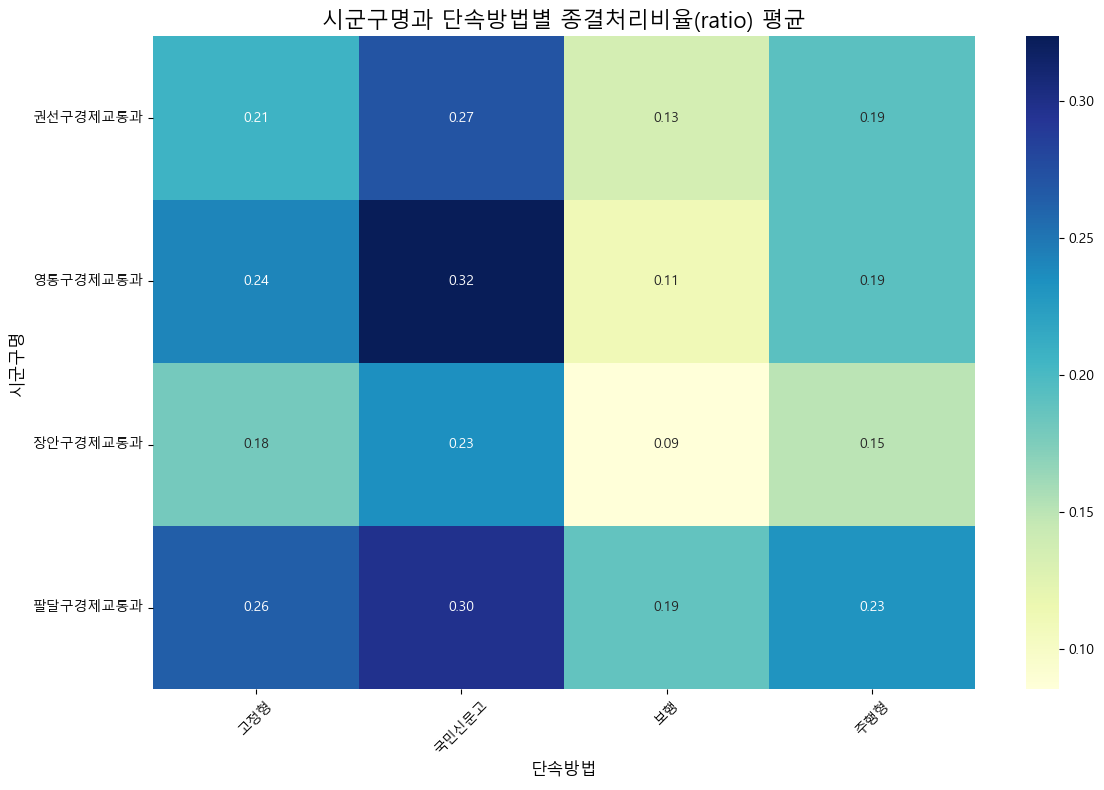

In [ ]:
# 히트맵 시각화

# 한글 폰트 설정 (맑은 고딕 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows용
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 기호 깨짐 방지

plt.figure(figsize=(12, 8))
sns.heatmap(pivot,           # 시각화할 데이터프레임
            annot=True,      # 각 셀에 숫자 표시
            fmt=".2f",       # 소수점 둘째자리까지 표시
            cmap="YlGnBu")   # 색상 팔레트
plt.title('시군구명과 단속방법별 종결처리비율(ratio) 평균', fontsize=16)
plt.xlabel('단속방법', fontsize=12)
plt.ylabel('시군구명', fontsize=12)
plt.xticks(rotation=45)  # x축 레이블 45도 회전
plt.yticks(rotation=0)   # y축 레이블 정렬
plt.tight_layout()
plt.show()